In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import mode
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mensdata/MyntraWomensCategoryDataNew.csv
/kaggle/input/mensdata/MyntraMensCategoryData.csv
/kaggle/input/mensdata/MyntraWomensCategoryData.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/mensdata/MyntraMensCategoryData.csv")
dataset.head(10000)

,BrandName,Category,Individual_category,Description,discount_price,original_price,discount,SizeOption,ratings,reviews
0,HRX by Hrithik Roshan,Sports Wear,track-pants,hrx by hrithik roshan men olive green camo ath...,759,1899,60%,"S, M, L, XL, XXL",4.0,988
1,Roadster,Topwear,shirts,roadster men sea green pure cotton sustainable...,599,1199,50%,"38, 40, 42, 44, 46, 48",4.3,988
2,Roadster,Bottom Wear,jeans,roadster men navy blue super skinny fit acid w...,799,1999,60%,"28, 30, 32, 34, 36, 38, 40",3.8,987
3,HRX by Hrithik Roshan,Inner Wear & Sleep Wear,socks,hrx by hrithik roshan men quarter length pack ...,359,599,40%,Onesize,4.5,987
4,Moda Rapido,Topwear,tshirts,moda rapido men olive green yellow striped co...,479,1199,60%,"S, M, L, XL",4.2,987
...,...,...,...,...,...,...,...,...,...,...
504,Slazenger,Bottom Wear,shorts,slazenger men green printed detail rapid dry ...,679,1699,60%,"26, 28, 30, 32, 34, 36",4.9,7
505,Breakbounce,Bottom Wear,shorts,breakbounce men olive green solid slim fit reg...,629,1499,58%,"28, 30, 32, 34, 36",4.9,7
506,Allen Solly Tribe,Bottom Wear,shorts,allen solly tribe men blue slim fit mid rise r...,1049,1499,30%,"28, 30, 32, 34, 36, 38",5.0,7
507,DEYANN,Indian Wear,kurtas,deyann men yellow solid straight kurta,766,2190,65%,"S, M, L, XL, XXL, 3XL",4.9,7


In [ ]:
actual_dis = dataset['ori']

In [3]:
dataset.discount_price.describe()

count     509.000000
mean      919.017682
std       461.933473
min       199.000000
25%       599.000000
50%       799.000000
75%      1119.000000
max      2449.000000
Name: discount_price, dtype: float64

<Axes: xlabel='discount_price', ylabel='Count'>

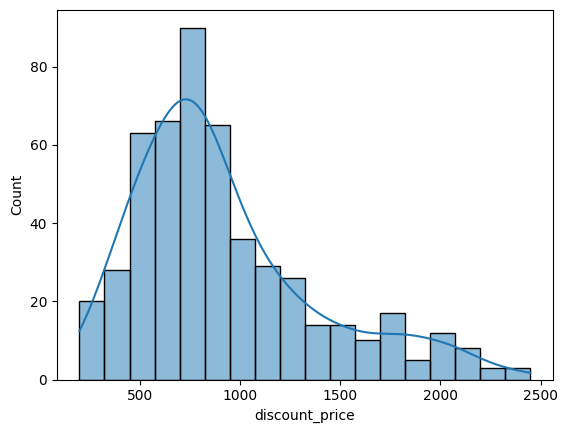

In [4]:
sn.histplot(dataset.discount_price, kde=True)

In [5]:
dataset.ratings.describe()

count    509.000000
mean       3.789391
std        0.923493
min        1.000000
25%        3.400000
50%        4.100000
75%        4.400000
max        5.000000
Name: ratings, dtype: float64

<Axes: xlabel='ratings', ylabel='Count'>

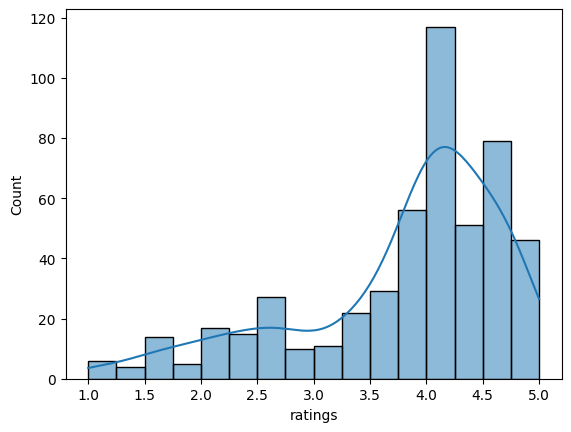

In [6]:
sn.histplot(dataset.ratings, kde=True)

Correlation between discount_price and ratings: -0.13017182591358542


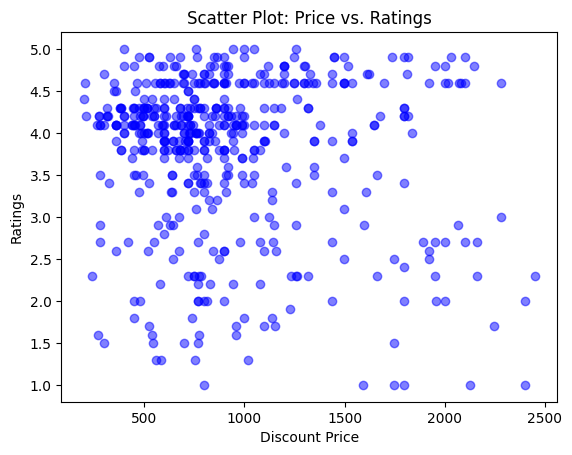

In [7]:
correlation = dataset['discount_price'].corr(dataset['ratings'])
print(f'Correlation between discount_price and ratings: {correlation}')

# Scatter plot
plt.scatter(dataset['discount_price'], dataset['ratings'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Price vs. Ratings')
plt.xlabel('Discount Price')
plt.ylabel('Ratings')
plt.show()

Correlation below 1000: -0.014741728159099122


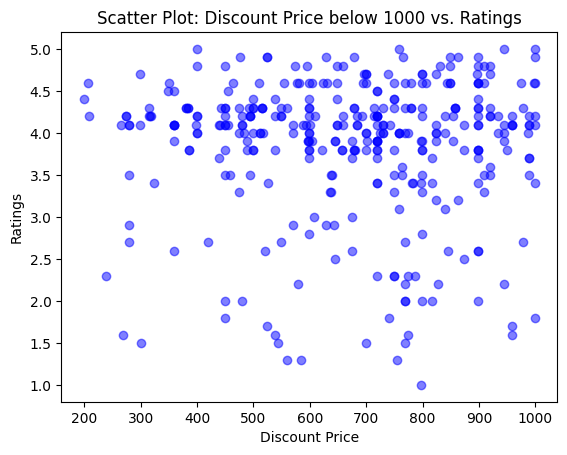

Correlation above 1000: -0.18682971903792267


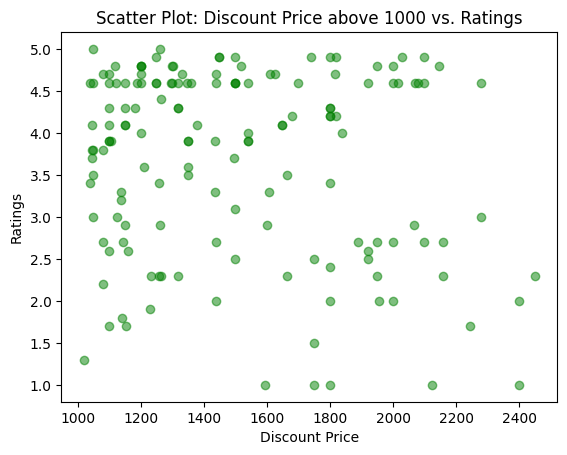

In [8]:
# Filter data for discount_price below 1000
below_1000 = dataset[dataset['discount_price'] < 1000]

# Calculate the correlation for discount_price below 1000 and ratings
correlation_below_1000 = below_1000['discount_price'].corr(below_1000['ratings'])
print(f'Correlation below 1000: {correlation_below_1000}')

# Scatter plot for discount_price below 1000 and ratings
plt.scatter(below_1000['discount_price'], below_1000['ratings'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Discount Price below 1000 vs. Ratings')
plt.xlabel('Discount Price')
plt.ylabel('Ratings')
plt.show()

# Filter data for discount_price above 1000
above_1000 = dataset[dataset['discount_price'] > 1000]

# Calculate the correlation for discount_price above 1000 and ratings
correlation_above_1000 = above_1000['discount_price'].corr(above_1000['ratings'])
print(f'Correlation above 1000: {correlation_above_1000}')

# Scatter plot for discount_price above 1000 and ratings
plt.scatter(above_1000['discount_price'], above_1000['ratings'], alpha=0.5, color='green')
plt.title('Scatter Plot: Discount Price above 1000 vs. Ratings')
plt.xlabel('Discount Price')
plt.ylabel('Ratings')
plt.show()

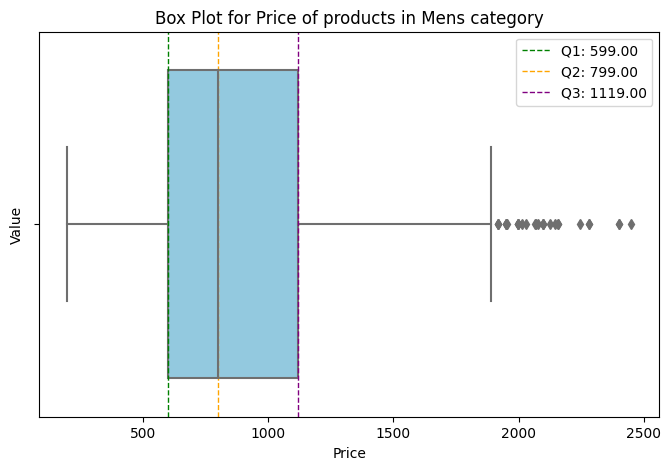

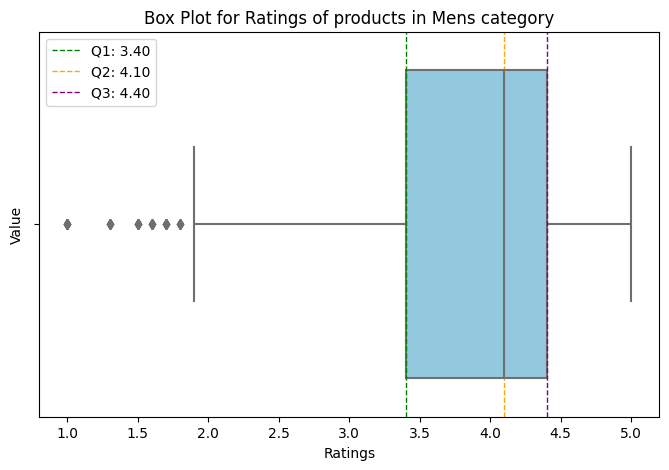

In [9]:
# Box plot for price
plt.figure(figsize=(8, 5))
sn.boxplot(x=dataset['discount_price'], color='skyblue')

plt.axvline(dataset['discount_price'].quantile(0.25), color='green', linestyle='dashed', linewidth=1, label=f'Q1: {dataset["discount_price"].quantile(0.25):.2f}')
plt.axvline(dataset['discount_price'].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Q2: {dataset["discount_price"].median():.2f}')
plt.axvline(dataset['discount_price'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {dataset["discount_price"].quantile(0.75):.2f}')

plt.title('Box Plot for Price of products in Mens category')
plt.xlabel('Price')
plt.ylabel('Value')
plt.legend()
plt.show()

# Box plot for ratings
plt.figure(figsize=(8, 5))
sn.boxplot(x=dataset['ratings'], color='skyblue')

plt.axvline(dataset['ratings'].quantile(0.25), color='green', linestyle='dashed', linewidth=1, label=f'Q1: {dataset["ratings"].quantile(0.25):.2f}')
plt.axvline(dataset['ratings'].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Q2: {dataset["ratings"].median():.2f}')
plt.axvline(dataset['ratings'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {dataset["ratings"].quantile(0.75):.2f}')

plt.title('Box Plot for Ratings of products in Mens category')
plt.xlabel('Ratings')
plt.ylabel('Value')
plt.legend()
plt.show()

In [10]:
std_discount_price = dataset['discount_price'].std()
var_discount_price = dataset['discount_price'].var()

std_ratings = dataset['ratings'].std()
var_ratings = dataset['ratings'].var()

# Display standard deviation and variance
print(f'Standard Deviation of Discount Price: {std_discount_price}')
print(f'Variance of Discount Price: {var_discount_price}')

print(f'Standard Deviation of Ratings: {std_ratings}')
print(f'Variance of Ratings: {var_ratings}')

Standard Deviation of Discount Price: 461.93347264655756
Variance of Discount Price: 213382.53315130793
Standard Deviation of Ratings: 0.9234933582187104
Variance of Ratings: 0.8528399826740714


In [11]:
discount_price_mode = dataset['discount_price'].mode()

# Display the mode
print(f'Mode of Discount Price: {discount_price_mode}')

discount_price_mode_scalar = discount_price_mode[0]
print(f'Mode of Discount Price (Scalar): {discount_price_mode_scalar}')

Mode of Discount Price: 0    899
Name: discount_price, dtype: int64
Mode of Discount Price (Scalar): 899


/tmp/ipykernel_20/2237498642.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(dataset['discount_price'], color='skyblue', shade=True)


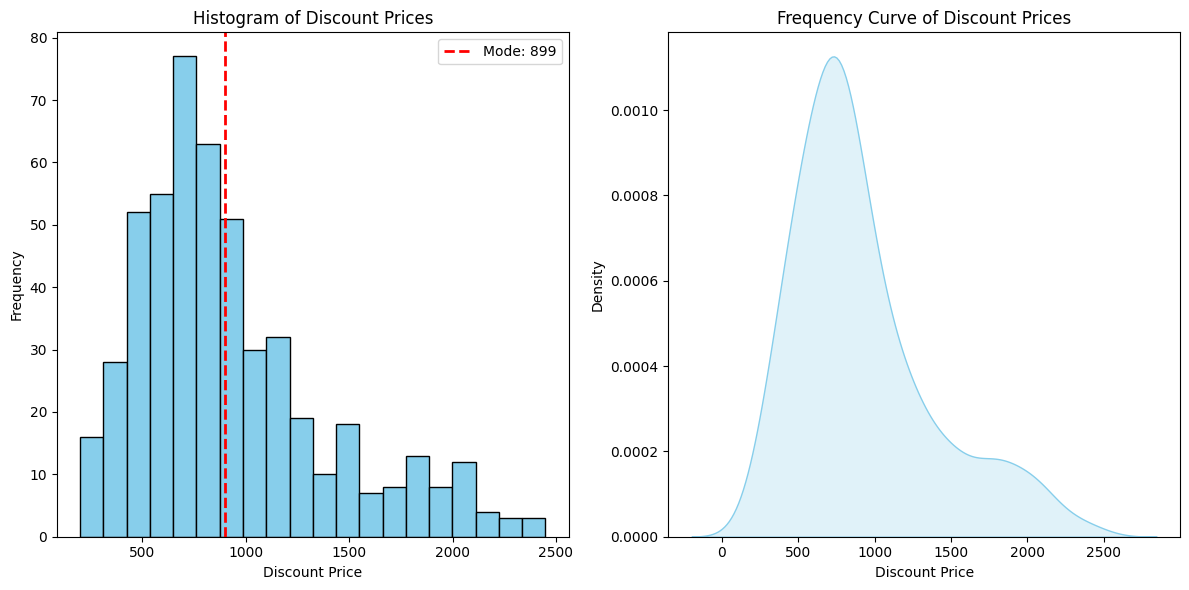

In [12]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(dataset['discount_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')

# Calculate and plot mode
discount_price_mode = dataset['discount_price'].mode()
discount_price_mode_scalar = discount_price_mode[0]
plt.axvline(discount_price_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {discount_price_mode_scalar}')
plt.legend()

# Plot frequency curve for discount_price
plt.subplot(1, 2, 2)
sn.kdeplot(dataset['discount_price'], color='skyblue', shade=True)
plt.title('Frequency Curve of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

/tmp/ipykernel_20/1084924455.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(dataset['ratings'], color='lightgreen', shade=True)


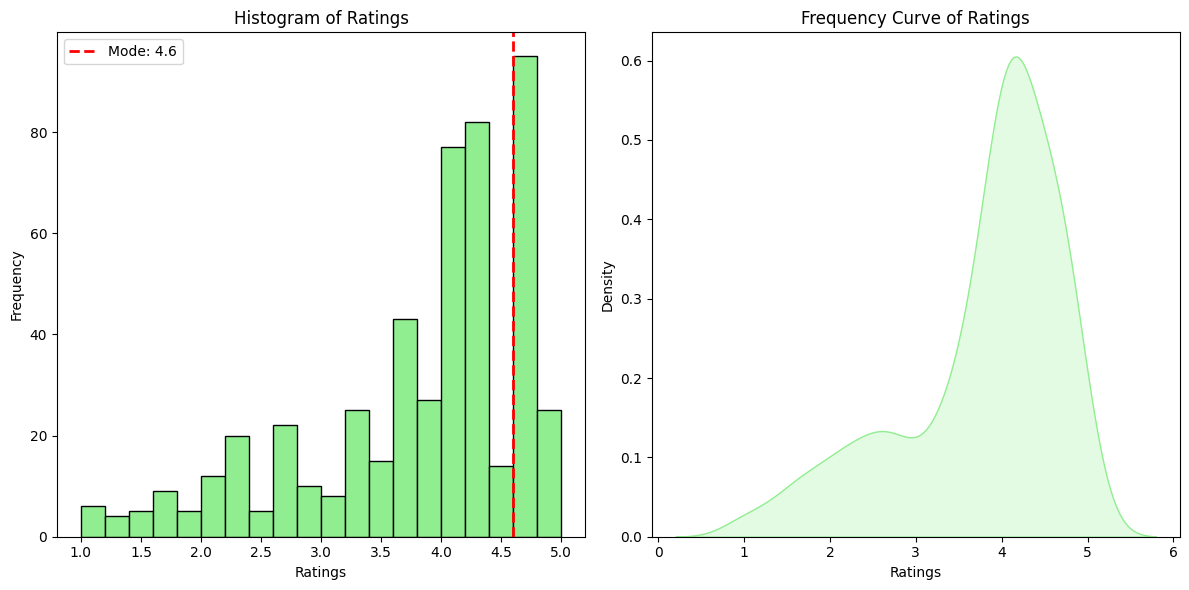

In [13]:
# Plot histogram for ratings
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(dataset['ratings'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

# Calculate and plot mode
ratings_mode = dataset['ratings'].mode()
ratings_mode_scalar = ratings_mode[0]
plt.axvline(ratings_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {ratings_mode_scalar}')
plt.legend()

# Plot frequency curve for ratings
plt.subplot(1, 2, 2)
sn.kdeplot(dataset['ratings'], color='lightgreen', shade=True)
plt.title('Frequency Curve of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

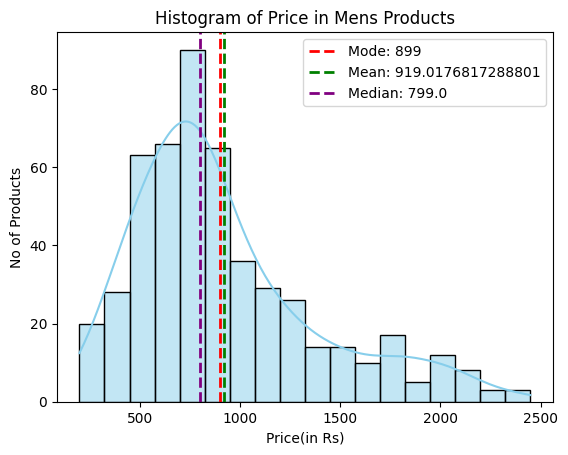

In [14]:
sn.histplot(dataset['discount_price'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(discount_price_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {discount_price_mode_scalar}')
plt.legend()

discount_price_mean = dataset['discount_price'].mean()
plt.axvline(discount_price_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {discount_price_mean}')
plt.legend()

# Calculate and plot median
discount_price_median = dataset['discount_price'].median()
plt.axvline(discount_price_median, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {discount_price_median}')
plt.legend()

# Set plot labels and title
plt.title('Histogram of Price in Mens Products')
plt.xlabel('Price(in Rs)')
plt.ylabel('No of Products')

# Show the plot
plt.show()

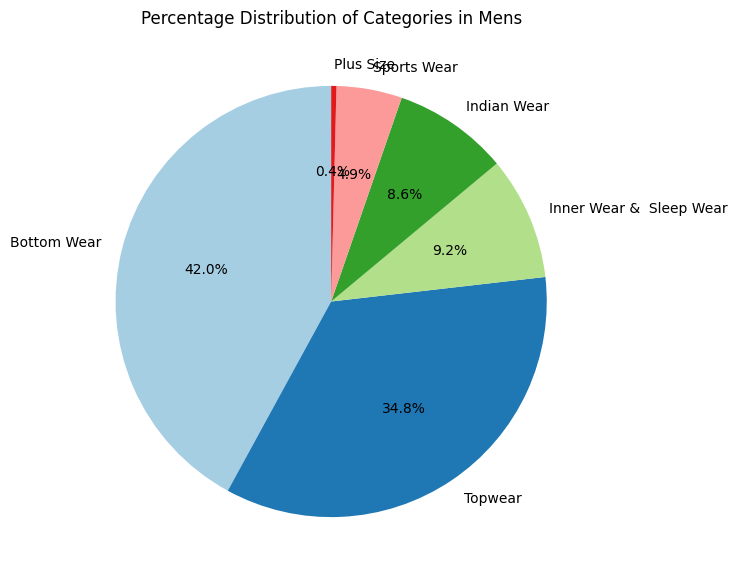

In [15]:
category_counts = dataset['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Categories in Mens')
plt.show()

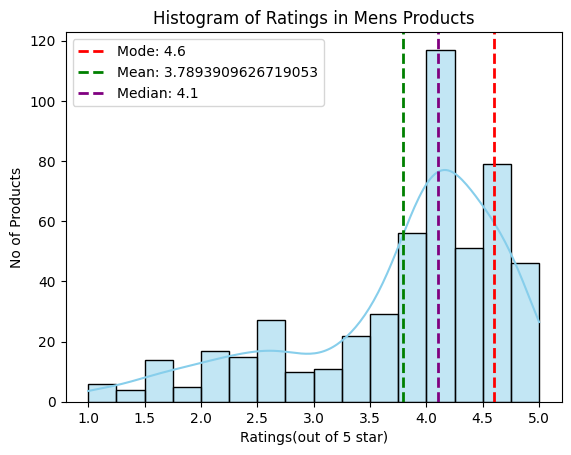

In [16]:
sn.histplot(dataset['ratings'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(ratings_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {ratings_mode_scalar}')
plt.legend()

ratings_mean = dataset['ratings'].mean()
plt.axvline(ratings_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {ratings_mean}')
plt.legend()

# Calculate and plot median
ratings_median = dataset['ratings'].median()
plt.axvline(ratings_median, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {ratings_median}')
plt.legend()

# Set plot labels and title
plt.title('Histogram of Ratings in Mens Products')
plt.xlabel('Ratings(out of 5 star)')
plt.ylabel('No of Products')

# Show the plot
plt.show()